In [78]:
import os, sys
import time
import datetime
import pandas as pd
import numpy as np
import math
from math import radians, cos, sin, asin, sqrt 
import random


import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.patches import Ellipse, Circle

ROOTDIR = os.path.abspath(os.path.realpath('./')) + '/Py'

sys.path.append(os.path.join(ROOTDIR, ''))

import geopandas as gp
import shapely

import scipy.stats



# Parameter

In [79]:
Daily_path='./Data/Daily_Feature/'

Load_path='./Data/Processed/'

Hot_spot_path='./Data/Hot_spot/'

MCMF_path='./Data/MCMF/'

CMMDP_path='./Data/CMMDP/'

date_str='2019-11-01'



# Performance: Income per hour

In [80]:
'''Income per hour'''


'''Hot_spot walk'''

Request_data_1=pd.read_csv(os.path.join(Hot_spot_path,'Request_data'+date_str+'.csv'))

Request_data_1=Request_data_1.drop(columns=['Unnamed: 0'])

Request_data_1['hour']=Request_data_1.apply(lambda x:int(x['Pickup_step']/6),axis=1)

Income_data_1=Request_data_1.groupby(['hour','Driver_id']).sum()[['Reward_unit']]

Income_data_1['Transition']=Income_data_1.index

Income_data_1['hour']=Income_data_1.apply(lambda x:x['Transition'][0],axis=1)

Income_data_1['Driver_id']=Income_data_1.apply(lambda x:x['Transition'][1],axis=1)

Income_data_1=Income_data_1.reset_index(drop=True)

Income_data_1=Income_data_1[['hour','Driver_id','Reward_unit']]

Income_data_1=Income_data_1.groupby(['Driver_id']).mean()[['Reward_unit']]

Income_data_1['Driver_id']=Income_data_1.index

Income_data_1=Income_data_1.loc[Income_data_1['Reward_unit']<=100,'Reward_unit']

IPH_1=list(Income_data_1)


'''MCMF'''

Request_data_2=pd.read_csv(os.path.join(MCMF_path,'Request_data'+date_str+'.csv'))

Request_data_2=Request_data_2.drop(columns=['Unnamed: 0'])

Request_data_2['hour']=Request_data_2.apply(lambda x:int(x['Pickup_step']/6),axis=1)

Income_data_2=Request_data_2.groupby(['hour','Driver_id']).sum()[['Reward_unit']]

Income_data_2['Transition']=Income_data_2.index

Income_data_2['hour']=Income_data_2.apply(lambda x:x['Transition'][0],axis=1)

Income_data_2['Driver_id']=Income_data_2.apply(lambda x:x['Transition'][1],axis=1)

Income_data_2=Income_data_2.reset_index(drop=True)

Income_data_2=Income_data_2[['hour','Driver_id','Reward_unit']]

Income_data_2=Income_data_2.groupby(['Driver_id']).mean()[['Reward_unit']]

Income_data_2['Driver_id']=Income_data_2.index

Income_data_2=Income_data_2.loc[Income_data_2['Reward_unit']<=100,'Reward_unit']

IPH_2=list(Income_data_2)


'''MCMF'''

Request_data_3=pd.read_csv(os.path.join(CMMDP_path,'Request_data'+date_str+'.csv'))

Request_data_3=Request_data_3.drop(columns=['Unnamed: 0'])

Request_data_3['hour']=Request_data_3.apply(lambda x:int(x['Pickup_step']/6),axis=1)

Income_data_3=Request_data_3.groupby(['hour','Driver_id']).sum()[['Reward_unit']]

Income_data_3['Transition']=Income_data_3.index

Income_data_3['hour']=Income_data_3.apply(lambda x:x['Transition'][0],axis=1)

Income_data_3['Driver_id']=Income_data_3.apply(lambda x:x['Transition'][1],axis=1)

Income_data_3=Income_data_3.reset_index(drop=True)

Income_data_3=Income_data_3[['hour','Driver_id','Reward_unit']]

Income_data_3=Income_data_3.groupby(['Driver_id']).mean()[['Reward_unit']]

Income_data_3['Driver_id']=Income_data_3.index

Income_data_3=Income_data_3.loc[Income_data_3['Reward_unit']<=100,'Reward_unit']

IPH_3=list(Income_data_3)



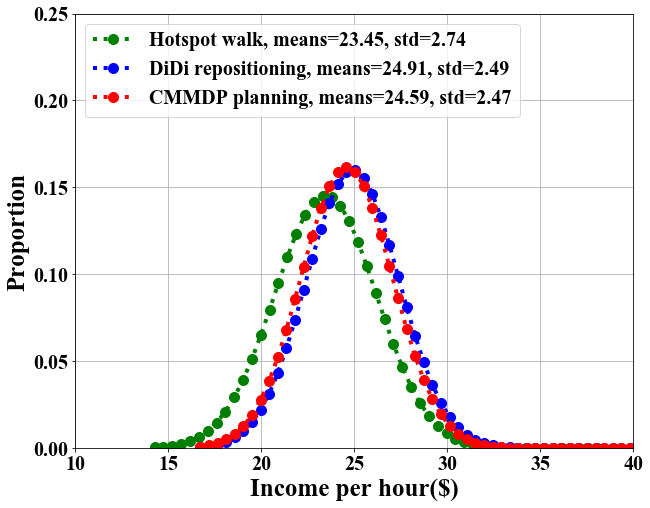

In [81]:
'''Figure'''

figsize = 10,8


font_label = {'family' : 'Times New Roman','weight' : 'normal','size': 25}

font_legend = {'family' : 'Times New Roman','weight' : 'normal','size': 20}

figure, ax1 = plt.subplots(figsize=figsize)

labels = ax1.get_xticklabels() + ax1.get_yticklabels()

[label.set_fontsize(20) for label in labels]

[label.set_fontname('Times New Roman') for label in labels]

'''Hotspot walk'''

mu =np.mean(IPH_1); sigma =np.std(IPH_1)

n, bins, patches = ax1.hist(IPH_1, 50, density=True, facecolor='g', alpha=0)

y = scipy.stats.norm.pdf(bins, mu, sigma)

ax1.plot(bins, y, color='g',linestyle=':',marker='o',linewidth=4, markersize=10,label='Hotspot walk, means='+str(round(mu,2))+', std='+str(round(sigma,2)))

'''MCMF'''

mu =np.mean(IPH_2); sigma =np.std(IPH_2)

n, bins, patches = ax1.hist(IPH_2, 50, density=True, facecolor='g', alpha=0)

y = scipy.stats.norm.pdf(bins, mu, sigma)

ax1.plot(bins, y, color='b',linestyle=':',marker='o',linewidth=4, markersize=10,label='DiDi repositioning, means='+str(round(mu,2))+', std='+str(round(sigma,2)))


'''CMMDP'''

mu =np.mean(IPH_3); sigma =np.std(IPH_3)

n, bins, patches = ax1.hist(IPH_2, 50, density=True, facecolor='r', alpha=0)

y = scipy.stats.norm.pdf(bins, mu, sigma)

ax1.plot(bins, y, color='r',linestyle=':',marker='o',linewidth=4, markersize=10,label='CMMDP planning, means='+str(round(mu,2))+', std='+str(round(sigma,2)))




ax1.set_ylabel('Proportion',font_label) 

ax1.set_xlabel('Income per hour($)',font_label)

ax1.set_xlim([10,40])

ax1.set_ylim([0,0.25])

ax1.legend(loc = 'upper left',prop=font_legend)



xmajorLocator   = MultipleLocator(5)

ax1.xaxis.set_major_locator(xmajorLocator) 


plt.grid()

plt.show()

# Performance: Income per hour

In [82]:
'''Income per minute'''

'''Hot_spot walk'''

Driver_data_1=pd.read_csv(os.path.join(Hot_spot_path,'Driver_data'+date_str+'.csv'))

Driver_data_1=Driver_data_1.drop(columns=['Unnamed: 0'])

Driver_data_1=Driver_data_1.loc[Driver_data_1['Order_id']!=-1]

Driver_data_1=Driver_data_1[['Driver_id','Location_id','Order_id','step']]

Driver_data_1['hour']=Driver_data_1.apply(lambda x:int(x['step']/6.0),axis=1)


Duration_data_1=Driver_data_1.groupby(['hour','Driver_id']).count()[['Order_id']]

Duration_data_1['Transition']=Duration_data_1.index

Duration_data_1['hour']=Duration_data_1.apply(lambda x:x['Transition'][0],axis=1)

Duration_data_1['Driver_id']=Duration_data_1.apply(lambda x:x['Transition'][1],axis=1)

Duration_data_1=Duration_data_1.reset_index(drop=True)

Duration_data_1=Duration_data_1.rename(index=str, columns={"Order_id": "Duration"})

Duration_data_1=Duration_data_1[['hour','Driver_id','Duration']]

Duration_data_1=Duration_data_1.groupby(['Driver_id']).mean()[['Duration']]

Duration_data_1['Driver_id']=Duration_data_1.index

Duration_data_1=Duration_data_1.reset_index(drop=True)

Duration_data_1=Duration_data_1[['Driver_id','Duration']]

Duration_data_1['Duration']=Duration_data_1.apply(lambda x:round(100*x['Duration']/6.0,1),axis=1)

Duration_1=list(Duration_data_1['Duration'])


'''MCMF'''


Driver_data_2=pd.read_csv(os.path.join(MCMF_path,'Driver_data'+date_str+'.csv'))

Driver_data_2=Driver_data_2.drop(columns=['Unnamed: 0'])

Driver_data_2=Driver_data_2.loc[Driver_data_2['Order_id']!=-1]

Driver_data_2=Driver_data_2[['Driver_id','Location_id','Order_id','step']]

Driver_data_2['hour']=Driver_data_2.apply(lambda x:int(x['step']/6.0),axis=1)


Duration_data_2=Driver_data_2.groupby(['hour','Driver_id']).count()[['Order_id']]

Duration_data_2['Transition']=Duration_data_2.index

Duration_data_2['hour']=Duration_data_2.apply(lambda x:x['Transition'][0],axis=1)

Duration_data_2['Driver_id']=Duration_data_2.apply(lambda x:x['Transition'][1],axis=1)

Duration_data_2=Duration_data_2.reset_index(drop=True)

Duration_data_2=Duration_data_2.rename(index=str, columns={"Order_id": "Duration"})

Duration_data_2=Duration_data_2[['hour','Driver_id','Duration']]

Duration_data_2=Duration_data_2.groupby(['Driver_id']).mean()[['Duration']]

Duration_data_2['Driver_id']=Duration_data_2.index

Duration_data_2=Duration_data_2.reset_index(drop=True)

Duration_data_2=Duration_data_2[['Driver_id','Duration']]

Duration_data_2['Duration']=Duration_data_2.apply(lambda x:round(100*x['Duration']/6.0,1),axis=1)

Duration_2=list(Duration_data_2['Duration'])



'''CMMDP'''


Driver_data_3=pd.read_csv(os.path.join(CMMDP_path,'Driver_data'+date_str+'.csv'))

Driver_data_3=Driver_data_3.drop(columns=['Unnamed: 0'])

Driver_data_3=Driver_data_3.loc[Driver_data_3['Order_id']!=-1]

Driver_data_2=Driver_data_3[['Driver_id','Location_id','Order_id','step']]

Driver_data_3['hour']=Driver_data_3.apply(lambda x:int(x['step']/6.0),axis=1)


Duration_data_3=Driver_data_3.groupby(['hour','Driver_id']).count()[['Order_id']]

Duration_data_3['Transition']=Duration_data_3.index

Duration_data_3['hour']=Duration_data_3.apply(lambda x:x['Transition'][0],axis=1)

Duration_data_3['Driver_id']=Duration_data_3.apply(lambda x:x['Transition'][1],axis=1)

Duration_data_3=Duration_data_3.reset_index(drop=True)

Duration_data_3=Duration_data_3.rename(index=str, columns={"Order_id": "Duration"})

Duration_data_3=Duration_data_3[['hour','Driver_id','Duration']]

Duration_data_3=Duration_data_3.groupby(['Driver_id']).mean()[['Duration']]

Duration_data_3['Driver_id']=Duration_data_3.index

Duration_data_3=Duration_data_3.reset_index(drop=True)

Duration_data_3=Duration_data_3[['Driver_id','Duration']]

Duration_data_3['Duration']=Duration_data_3.apply(lambda x:round(100*x['Duration']/6.0,1),axis=1)

Duration_3=list(Duration_data_3['Duration'])





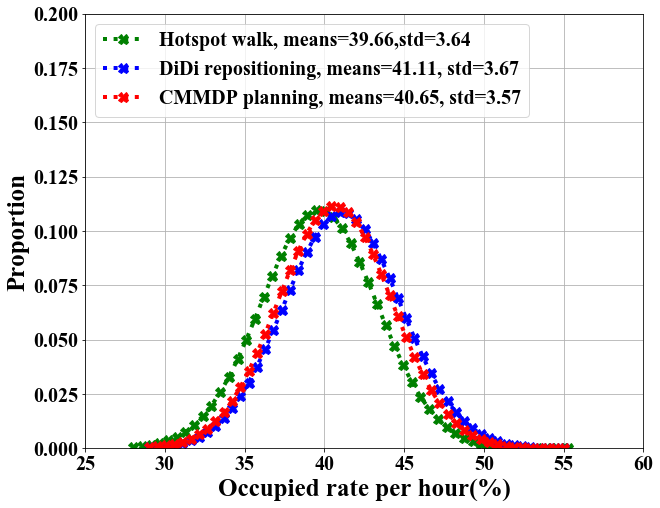

In [83]:
'''Figure'''

figsize = 10,8

font_label = {'family' : 'Times New Roman','weight' : 'normal','size': 25}

font_legend = {'family' : 'Times New Roman','weight' : 'normal','size': 20}

figure, ax1 = plt.subplots(figsize=figsize)

labels = ax1.get_xticklabels() + ax1.get_yticklabels()

[label.set_fontsize(20) for label in labels]

[label.set_fontname('Times New Roman') for label in labels]

'''Hotspot walk'''

mu =np.mean(Duration_1); sigma =np.std(Duration_1)

n, bins, patches = ax1.hist(Duration_1, 50, density=True,facecolor='g', alpha=0)

y = scipy.stats.norm.pdf(bins, mu, sigma)

ax1.plot(bins, y, color='g',linestyle=':',marker='X',linewidth=4, markersize=10,label='Hotspot walk, means='+str(round(mu,2))+',std='+str(round(sigma,2)))

'''MCMF'''

mu =np.mean(Duration_2); sigma =np.std(Duration_2)

n, bins, patches = ax1.hist(Duration_2, 50, density=True, facecolor='g', alpha=0)

y = scipy.stats.norm.pdf(bins, mu, sigma)

ax1.plot(bins, y, color='b',linestyle=':',marker='X',linewidth=4, markersize=10,label='DiDi repositioning, means='+str(round(mu,2))+', std='+str(round(sigma,2)))

'''CMMDP'''

mu =np.mean(Duration_3); sigma =np.std(Duration_3)

n, bins, patches = ax1.hist(Duration_2, 50, density=True, facecolor='r', alpha=0)

y = scipy.stats.norm.pdf(bins, mu, sigma)

ax1.plot(bins, y, color='r',linestyle=':',marker='X',linewidth=4, markersize=10,label='CMMDP planning, means='+str(round(mu,2))+', std='+str(round(sigma,2)))




ax1.set_ylabel('Proportion',font_label) 

ax1.set_xlabel('Occupied rate per hour(%)',font_label)

ax1.set_xlim([25,60])

ax1.set_ylim([0,0.20])


ax1.legend(loc = 'upper left',prop=font_legend)




plt.grid()

plt.show()

# GMV

In [84]:
'''Income per hour'''


'''Hot_spot walk'''

Request_data_1=pd.read_csv(os.path.join(Hot_spot_path,'Request_data'+date_str+'.csv'))

Request_data_1=Request_data_1.drop(columns=['Unnamed: 0'])

Request_data_1['hour']=Request_data_1.apply(lambda x:int(x['Pickup_step']/6),axis=1)

GMV_data_1=Request_data_1.loc[Request_data_1['Driver_id']!=-1]

GMV_data_1=GMV_data_1.groupby(['hour']).sum()[['Reward_unit']]

GMV_data_1=GMV_data_1.rename(index=str, columns={"Reward_unit": "GMV"})

GMV_data_1['hour']=GMV_data_1.index

GMV_data_1=GMV_data_1[['hour','GMV']]

GMV_1=list(GMV_data_1['GMV'])

'''MCMF'''

Request_data_2=pd.read_csv(os.path.join(MCMF_path,'Request_data'+date_str+'.csv'))

Request_data_2=Request_data_2.drop(columns=['Unnamed: 0'])

Request_data_2['hour']=Request_data_2.apply(lambda x:int(x['Pickup_step']/6),axis=1)

GMV_data_2=Request_data_2.loc[Request_data_2['Driver_id']!=-1]

GMV_data_2=GMV_data_2.groupby(['hour']).sum()[['Reward_unit']]

GMV_data_2=GMV_data_2.rename(index=str, columns={"Reward_unit": "GMV"})

GMV_data_2['hour']=GMV_data_2.index

GMV_data_2=GMV_data_2[['hour','GMV']]

GMV_2=list(GMV_data_2['GMV'])

'''CMMDP'''

Request_data_3=pd.read_csv(os.path.join(CMMDP_path,'Request_data'+date_str+'.csv'))

Request_data_3=Request_data_3.drop(columns=['Unnamed: 0'])

Request_data_3['hour']=Request_data_3.apply(lambda x:int(x['Pickup_step']/6),axis=1)

GMV_data_3=Request_data_3.loc[Request_data_3['Driver_id']!=-1]

GMV_data_3=GMV_data_3.groupby(['hour']).sum()[['Reward_unit']]

GMV_data_3=GMV_data_3.rename(index=str, columns={"Reward_unit": "GMV"})

GMV_data_3['hour']=GMV_data_3.index

GMV_data_3=GMV_data_3[['hour','GMV']]

GMV_3=list(GMV_data_3['GMV'])





In [85]:
print('*'*50)
print('Hotspot walk: ',sum(GMV_1))
print('*'*50)
print('Didi Repositioning: ',sum(GMV_2))
print('*'*50)
print('CMMDP: ',sum(GMV_3))

**************************************************
Hotspot walk:  1504823.8299999998
**************************************************
Didi Repositioning:  1599808.97
**************************************************
CMMDP:  1609133.7899999998
